<div class='alert alert-success'>
    <h1 align="center">Search Algorithms: Uninformed Search Strategies</h1> 
    <h3 align="center">Artificial Intelligece LAB  (SPRING 2024)</h3>
</div>

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from collections import namedtuple

from utils import *
from npuzzle import NPuzzleState

In [24]:
# !pip install matplotlib

## Uninformed Search Strategies

In uniformed (blind) search strategies, we don't have any additional information other than the information provided in the problem formulation (states, actions, initial state and goal state(s)). 

Later you will see informed search strategis in which you have other information (heuristics) that during the search process guide you towards the goal state.

- BFS (Breadth First Search)
- UCS (Uniform Cost Search)
- DFS (Depth First Search)
- DLS (Depth Limitted Search)
- IDS (Iterative Deepening Search)

## Graph Search

<img src='imgs/Graph_Search_Algorithm.png' width='80%'>

### BFS
- Frontier is a FIFO list (or queue) and is implemented in the `utils.py`.

In [2]:
Node = namedtuple('Node', 'state parent action cost')

def BFS(start_state, goal_state):
    
    explored = set()
    
    frontier = Queue()
    frontier.push(Node(start_state, None, None, 0))    

    num_generated = 0
    
    while not frontier.is_empty():        
        # select a candidate node
        node = frontier.pop()
        explored.add(node.state)

        # goal test
        if node.state == goal_state: 
            return solution(node), num_generated
        
        # expand
        for successor, action, step_cost in node.state.successors():
            num_generated += 1
            if successor not in explored:
                frontier.push(Node(successor, node, action, node.cost + step_cost))
    
    return None, num_generated  # if no solution found

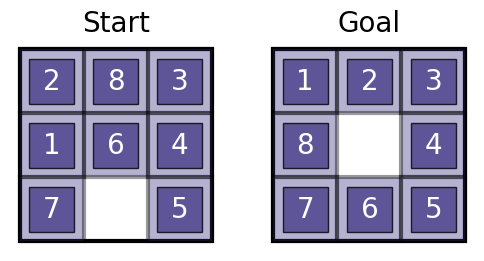

In [3]:
start_state_tiles = [
    2, 8, 3, 
    1, 6, 4, 
    7, 0, 5]

goal_state_tiles = [
    1, 2, 3, 
    8, 0, 4,
    7, 6, 5]

# define start state and goal state
start_state = NPuzzleState(tiles=start_state_tiles)
goal_state = NPuzzleState(tiles=goal_state_tiles)

# plot the start state and the goal state
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
start_state.plot(axes[0], 'Start')
goal_state.plot(axes[1], 'Goal')
plt.show()

Number of generated nodes: 122


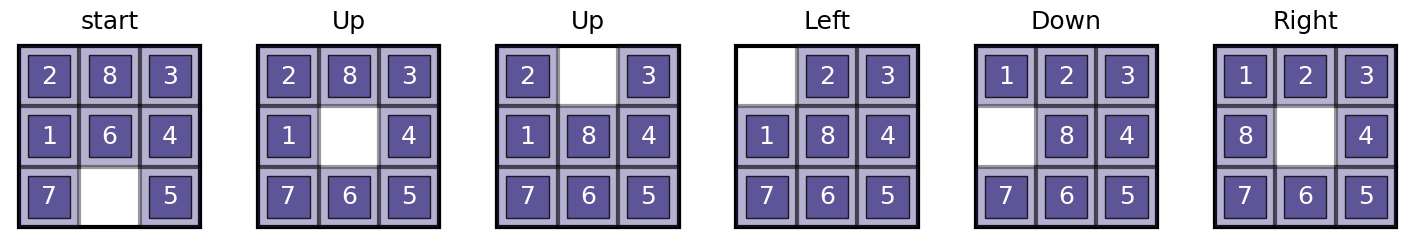

In [4]:
solution_path, N = BFS(start_state, goal_state)

print(f"Number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

### BFS Improvement 

- Performing goal test right **after generating a node** (not before expanding the node).

<img src='imgs/BFS.png' width='80%'>

In [5]:
Node = namedtuple('Node', 'state parent action cost')

def imporved_BFS(start_state, goal_state):
    
    explored = set()
    global num
    frontier = Queue()
    frontier.push(Node(start_state, None, None, 0))    

    num_generated = 0
    
    while not frontier.is_empty():        
        # select a candidate node
        node = frontier.pop()
        explored.add(node.state)

        # expand
        for successor, action, step_cost in node.state.successors():
            num_generated += 1
            if successor not in explored:
                frontier.push(Node(successor, node, action, node.cost + step_cost))
                # goal test
                if node.state == goal_state:   #shifted the whole if condition right down here
                    num = num_generated
                    return solution(node), num_generated
    
    return None, num_generated  # if no solution found
imporved_BFS(start_state, goal_state)


([(NPuzzleState(N=8, tiles=(2, 8, 3, 1, 0, 4, 7, 6, 5)), 'Up'),
  (NPuzzleState(N=8, tiles=(2, 0, 3, 1, 8, 4, 7, 6, 5)), 'Up'),
  (NPuzzleState(N=8, tiles=(0, 2, 3, 1, 8, 4, 7, 6, 5)), 'Left'),
  (NPuzzleState(N=8, tiles=(1, 2, 3, 0, 8, 4, 7, 6, 5)), 'Down'),
  (NPuzzleState(N=8, tiles=(1, 2, 3, 8, 0, 4, 7, 6, 5)), 'Right')],
 124)

Number of generated nodes: 124


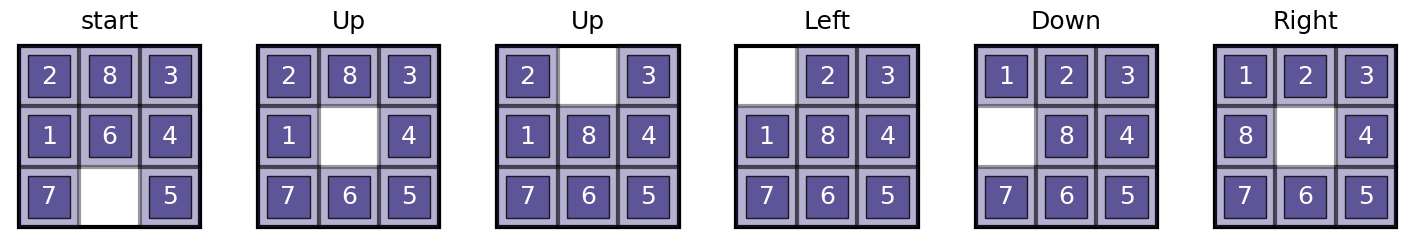

In [6]:
# Provide Visualization as Above in BFS
solution_path, N = BFS(start_state, goal_state)

print(f"Number of generated nodes: {num}")
show_solution(start_state, solution_path, ncols=6)

## UCS
- Frontier is a priority queue, in which nodes are sorted according to their path costs. 
- Again, the implementation of priority queue is given in the `utils.py`.

<img src='imgs/Best_First.png' width='80%'>

In [15]:
def UCS(start_state, goal_state):
    "COMPLETE THIS FUNCTION"
    pass    

In [14]:
# Provide Visualization as Above in BFS


**Note**: that because in this problem, the cost of all the actions are equal, the UCS strategy is exactly the same as BFS strategy (the unoptimized version).

### DFS
- Frontier is a LIFO list (or stack).

<img src='imgs/DFS_Example.png' width='80%'>

In [9]:
def DFS(start_state, goal_state):
    "COMPLETE THIS FUNCTION"
    pass    

In [10]:
# Provide Visualization as Above in BFS


### DLS

<img src='imgs/DLS_IDS.png' width='80%'>

In [13]:
from collections import namedtuple

Node = namedtuple('Node', 'state parent action cost')

def depth_limited_search(start_state, goal_state, depth_limit):
    explored = set()
    frontier = [(Node(start_state, None, None, 0), 0)]  # Using a list as a frontier with depth information

    num_generated = 0

    while frontier:
        node, depth = frontier.pop(0)
        explored.add(tuple(node.state))  # Convert list to tuple before adding to set

        if node.state == goal_state:
            return solution(node), num_generated

        if depth < depth_limit:
            for successor, action, step_cost in node.state.successors():
                num_generated += 1
                if tuple(successor) not in explored:  # Convert list to tuple before checking if it's in explored
                    frontier.append((Node(successor, node, action, node.cost + step_cost), depth + 1))

    return None, num_generated

def solution(node):
    # Trace back to the root node to construct the solution path
    path = []
    while node.parent is not None:
        path.append((node.action, node.state))
        node = node.parent
    path.reverse()
    return path

# Example usage:
start_state = [2, 8, 3, 1, 6, 4, 7, 0, 5]
goal_state = [1, 2, 3, 8, 0, 4, 8, 7, 6]
depth_limit = 10  # Set your desired depth limit here
solution_path, num_generated = depth_limited_search(start_state, goal_state, depth_limit)
print("Solution Path:", solution_path)
print("Number of Nodes Generated:", num_generated)


AttributeError: 'list' object has no attribute 'successors'

In [121]:
# I learned to code 
# I couldn't figure out what i had to do with DLS, so i made my own dictionary and solved the problem like this.
def dls(dict, start, goal, depth_limit):
    visited = set()
    stack = [(start, 0)]                             #                                    Tree:
    
    while stack:                                     
        vertex, depth = stack.pop()                  #                                      A
                                                     #                                     / \
        if vertex == goal:                           #                                    B   C
            print('Goal node reached:',vertex)       #                                   /\  /\
            return True                              #                                  D E F G
        
        if depth < depth_limit and vertex not in visited:
            print('Visiting:', vertex)
            visited.add(vertex)
            for i in reversed(dict[vertex]):
                stack.append((i, depth + 1))
    print('Goal not found within depth limit.')
    return False
dict = {'A' : ['B', 'C'], 'B' : ['D', 'E'], 'C' : ['F', 'G'], 'D' : [], 'E' : [], 'F' : [], 'G' : []}
found = dls(dict, 'A', 'F', 2)
found

Visiting: A
Visiting: B
Visiting: C
Goal node reached: F


True

Perform a depth limitted search with depth limit 15.

In [12]:
# Provide Visualization as Above in BFS


Perform a depth limitted search with depth limit 10.

Perform a depth limitted search with depth limit 5.

Perform a depth limitted search with depth limit 3.

### IDS

In [16]:
def IDS(start_state, goal_state):
    "COMPLETE THIS FUNCTION"
    pass    
    

In [13]:
# Provide Visualization as Above in BFS


## What is next?
- Time complexity of uninformed search strategies are **exponential**!
- Therefore, we need faster search strategis to solve hard real problems.
- In the next lesson, we will explore some informed search strategies which are usually much faster than uninformed search strategies.